In [10]:
!pwd

/Users/shihosato/src/github.com/twinkle13531/master_degree/202012/QA/25bit/0


In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import sys, os
sys.path.append(os.path.join('..', '..'))

In [13]:
import QA_DwaveSampler_AutoEmbedding as qda
import pandas as pd
import numpy as np
import timeit

In [14]:
#今回のデータ, parameters
bit = 25
num = 0
n = 10
num_reads = 1000
chain_strength = 12

In [15]:
path = '../../../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(path, sep=',')
bqm = qda.make_Hamiltonian(df)
time_once = timeit.timeit("qda.make_Hamiltonian(df)", globals=globals(), number=1)
QDA = qda.QA_DSampler_AEmbedding(df, bqm, time_once, n, num_reads, chain_strength)
valid_y_info_list, valid_y_num = QDA.find_valid_y_ntimes()

In [16]:
for valid_y_info in valid_y_info_list:
    print(valid_y_info)

[[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1], 0.0, 1, 0.0]
[[0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1], 0.0, 1, 0.0]
[[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0], 0.0, 1, 0.0]
[[0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0], 0.0, 1, 0.0]
[[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1], 0.0, 1, 0.0]
[[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0], 0.0, 1, 0.0]
[[0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1], 0.0, 1, 0.0]
[[0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], 0.0, 1, 0.0]
[[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0], 0.0, 1, 0.0]
[[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0], 0.0, 1, 0.0]
[[1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0], 0.0, 1, 0.0]

In [17]:
print('number of valid y of {} bit_{} data is {}'.format(bit, num,valid_y_num))

number of valid y of 25 bit_0 data is 121


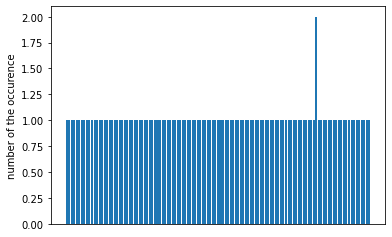

In [23]:
plot_path = 'DwSamplerAutoEmbed_{}bit_{}_n10_num1000_strength12_occurance_hist'.format(bit, num)
occurrence_list = qda.occurrence_hist(valid_y_info_list, plot_path)

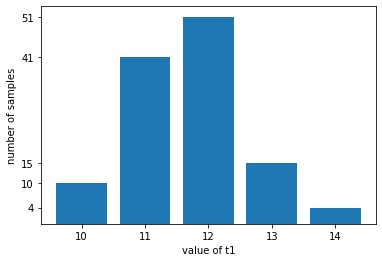

In [24]:
plot_path = 'DwSamplerAutoEmbed_{}bit_{}_n10_num1000_strength12_t1_hist'.format(bit, num)
hist_dic = QDA.y_num_t1_hist(valid_y_info_list, plot_path)

In [25]:
hist_dic

{14: 4, 12: 51, 13: 15, 11: 41, 10: 10}

In [26]:
sum(hist_dic.values())

121

In [27]:
print('p value of {}bit_{} data is {}'.format(bit, num, hist_dic[int(np.dot(df['Y'], df['LI']))]/sum(hist_dic.values())))

p value of 25bit_0 data is 0.08264462809917356


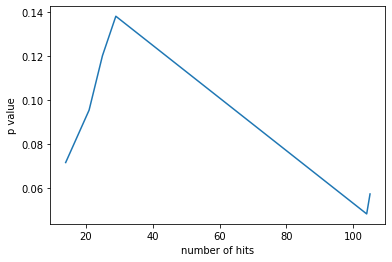

In [28]:
output_path = 'DwSamplerAutoEmbed_{}bit_{}_n10_num1000_strength11_p_value_transition'.format(bit, num)
valid_y_num, valid_y_list, p_dic = QDA.p_value_transition(valid_y_info_list, output_path) 

In [29]:
QDA.time_measurement()

0.00895031099997159

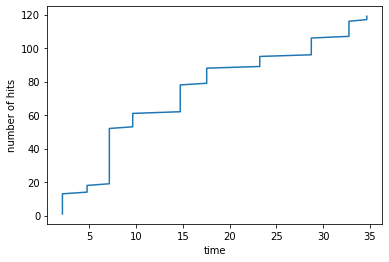

In [30]:
path = 'DSampler_AEmbed_{}bit_{}_time_num'.format(bit, num)
valid_y_list, valid_y_num_list, time_list = QDA.time_num_y(path)